## Import Necessary Libraries




In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt


# Load dataset from Google Drive!


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls
df = pd.read_csv('gdrive/MyDrive/NeuralNetworks/Datasets/AABA_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


# Show Head of Dataset

In [3]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


# Split Train and Test datasets
Train : 2006 - 2016
Test : 2017 - Now

In [4]:
train_set = df[:'2016'].iloc[:,1:2].values
test_set = df['2017':].iloc[:,1:2].values

## First view of dataset(train/test values)

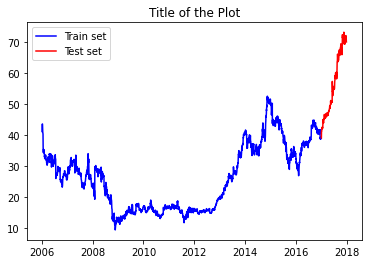

In [5]:
def magic_plot(plot1=None, plot2=None, title='Title of the Plot', label1='label1', label2=None, color1='b', color2=None):
    plt.title(title)
    plt.plot(plot1, label=label1, color=color1)
    plt.plot(plot2, label=label2, color=color2)
    plt.legend()
    plt.show()

magic_plot(plot1=df["High"][:'2016'], plot2=df["High"]['2017':], label1='Train set', label2='Test set', color2='r')

## Normalize dataset values to (0,1)

In [6]:
PERIOD = 60
scaler = MinMaxScaler()
normalized_train_set = scaler.fit_transform(train_set)
normalized_test_set = scaler.fit_transform(test_set)


In [7]:
X_train = []
y_train = []

for i in range(PERIOD, len(df[:'2016'])):
    X_train.append(normalized_train_set[i-PERIOD:i, 0])
    y_train.append(normalized_train_set[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))


## Train and valuation split

In [8]:
X_train, X_train_val, y_train, y_train_val = train_test_split(X_train, y_train, test_size=0.30, random_state=0)

# Model 1 
(Variable Units-Neurons)




# Train Model 1 (30 Neurons)

In [9]:
model1_30 = Sequential()

model1_30.add(LSTM(units=30, return_sequences=True))
model1_30.add(Dropout(0.5))

model1_30.add(LSTM(units=30, return_sequences=True))
model1_30.add(Dropout(0.5))

model1_30.add(LSTM(units=30))
model1_30.add(Dropout(0.5))

model1_30.add(Dense(units=1))

model1_30.compile(optimizer='adam',loss='mean_squared_error')

history1_30 = model1_30.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_train_val, y_train_val)
    )

Epoch 1/40
60/60 [==============================] - 16s 62ms/step - loss: 0.0384 - val_loss: 0.0041
Epoch 2/40
60/60 [==============================] - 1s 24ms/step - loss: 0.0137 - val_loss: 0.0017
Epoch 3/40
60/60 [==============================] - 1s 14ms/step - loss: 0.0111 - val_loss: 0.0033
Epoch 4/40
60/60 [==============================] - 1s 13ms/step - loss: 0.0103 - val_loss: 0.0015
Epoch 5/40
60/60 [==============================] - 1s 14ms/step - loss: 0.0087 - val_loss: 0.0014
Epoch 6/40
60/60 [==============================] - 1s 13ms/step - loss: 0.0081 - val_loss: 0.0026
Epoch 7/40
60/60 [==============================] - 1s 13ms/step - loss: 0.0079 - val_loss: 0.0016
Epoch 8/40
60/60 [==============================] - 1s 13ms/step - loss: 0.0065 - val_loss: 0.0015
Epoch 9/40
60/60 [==============================] - 1s 13ms/step - loss: 0.0070 - val_loss: 0.0015
Epoch 10/40
60/60 [==============================] - 1s 14ms/step - loss: 0.0061 - val_loss: 0.0015
Epoch 11

In [10]:
history1_30.history.keys()

dict_keys(['loss', 'val_loss'])

## Train Loss Model 1 (30 Neurons)

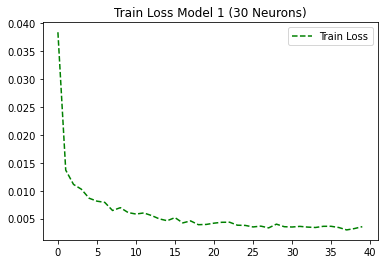

In [11]:
plt.title('Train Loss Model 1 (30 Neurons)')
plt.plot(history1_30.history['loss'], '--', label='Train Loss', color='g')
plt.legend()
plt.show()

## Validation Loss Model 1 (30 Neurons)

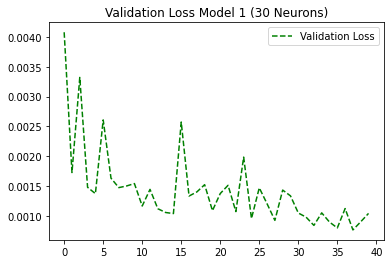

In [12]:
plt.title('Validation Loss Model 1 (30 Neurons)')
plt.plot(history1_30.history['val_loss'], '--', label='Validation Loss', color='g')
plt.legend()
plt.show()

# Prediction with Model 1 (30 Neurons)

8/8 [==============================] - 1s 6ms/step


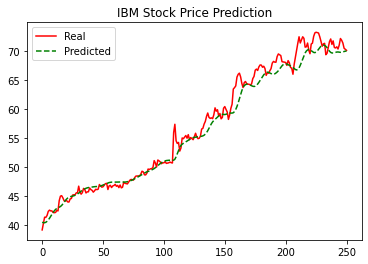

In [13]:
df2 = pd.concat((df["High"][:'2016'], df["High"]['2017':]), axis=0)
inputs = df2[len(df2) - len(test_set) - PERIOD:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(PERIOD, len(df['2017':]) + PERIOD):
    X_test.append(inputs[i-PERIOD:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
predict = model1_30.predict(X_test)
predict = scaler.inverse_transform(predict)

plt.plot(test_set, color='r',label='Real')
plt.plot(predict, '--', color='g',label='Predicted')
plt.title('IBM Stock Price Prediction')
plt.legend()
plt.show()

In [14]:
mse = 0
for i in range(len(test_set)):
    mse += (test_set[i] - predict[i]) ** 2

mse / len(test_set)

array([2.45258993])

# Train Model 1 (50 Neurons)

In [15]:
model1_50 = Sequential()

model1_50.add(LSTM(units=50, return_sequences=True))
model1_50.add(Dropout(0.5))

model1_50.add(LSTM(units=50, return_sequences=True))
model1_50.add(Dropout(0.5))

model1_50.add(LSTM(units=50))
model1_50.add(Dropout(0.5))

model1_50.add(Dense(units=1))

model1_50.compile(optimizer='rmsprop',loss='mean_squared_error')

history1_50 = model1_50.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_train_val, y_train_val)
    )

Epoch 1/40
60/60 [==============================] - 7s 33ms/step - loss: 0.0241 - val_loss: 0.0031
Epoch 2/40
60/60 [==============================] - 1s 15ms/step - loss: 0.0109 - val_loss: 0.0019
Epoch 3/40
60/60 [==============================] - 1s 15ms/step - loss: 0.0092 - val_loss: 0.0012
Epoch 4/40
60/60 [==============================] - 1s 14ms/step - loss: 0.0082 - val_loss: 0.0015
Epoch 5/40
60/60 [==============================] - 1s 15ms/step - loss: 0.0067 - val_loss: 0.0010
Epoch 6/40
60/60 [==============================] - 1s 14ms/step - loss: 0.0069 - val_loss: 0.0027
Epoch 7/40
60/60 [==============================] - 1s 15ms/step - loss: 0.0064 - val_loss: 0.0020
Epoch 8/40
60/60 [==============================] - 1s 14ms/step - loss: 0.0057 - val_loss: 0.0022
Epoch 9/40
60/60 [==============================] - 1s 14ms/step - loss: 0.0053 - val_loss: 0.0014
Epoch 10/40
60/60 [==============================] - 1s 14ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 11/

## Train Loss Model 1 (50 Neurons)

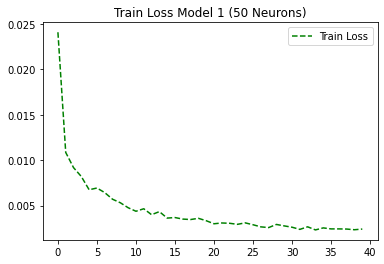

In [16]:
plt.title('Train Loss Model 1 (50 Neurons)')
plt.plot(history1_50.history['loss'], '--', label='Train Loss', color='g')
plt.legend()
plt.show()

## Validation Loss Model 1 (50 Neurons)

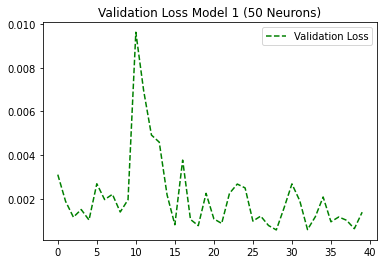

In [17]:
plt.title('Validation Loss Model 1 (50 Neurons)')
plt.plot(history1_50.history['val_loss'], '--', label='Validation Loss', color='g')
plt.legend()
plt.show()

# Prediction with Model 1 (50 Neurons)

8/8 [==============================] - 1s 6ms/step


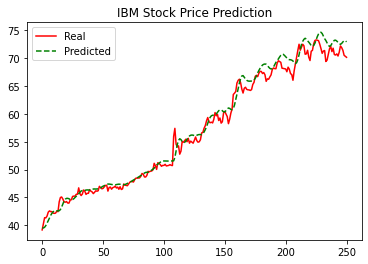

In [18]:
df2 = pd.concat((df["High"][:'2016'], df["High"]['2017':]), axis=0)
inputs = df2[len(df2) - len(test_set) - PERIOD:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(PERIOD, len(df['2017':]) + PERIOD):
    X_test.append(inputs[i-PERIOD:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
predict = model1_50.predict(X_test)
predict = scaler.inverse_transform(predict)

plt.plot(test_set, color='r',label='Real')
plt.plot(predict, '--', color='g',label='Predicted')
plt.title('IBM Stock Price Prediction')
plt.legend()
plt.show()

## Mean Squared Error for Model 1 (50 Neurons)

In [19]:
mse = 0
for i in range(len(test_set)):
    mse += (test_set[i] - predict[i]) ** 2

mse / len(test_set)

array([1.91632002])

# Model 2
(Variable Number of Layers)




# Train Model 2 (5 Layers)

In [20]:
model2_5 = Sequential()

model2_5.add(LSTM(units=50, return_sequences=True))
model2_5.add(Dropout(0.5))

model2_5.add(LSTM(units=50, return_sequences=True))
model2_5.add(Dropout(0.5))

model2_5.add(LSTM(units=50, return_sequences=True))
model2_5.add(Dropout(0.5))

model2_5.add(LSTM(units=50, return_sequences=True))
model2_5.add(Dropout(0.5))

model2_5.add(LSTM(units=50))
model2_5.add(Dropout(0.5))

model2_5.add(Dense(units=1))

model2_5.compile(optimizer='rmsprop',loss='mean_squared_error')

history2_5 = model2_5.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_train_val, y_train_val)
    )

Epoch 1/50
60/60 [==============================] - 12s 52ms/step - loss: 0.0283 - val_loss: 0.0033
Epoch 2/50
60/60 [==============================] - 1s 22ms/step - loss: 0.0142 - val_loss: 0.0399
Epoch 3/50
60/60 [==============================] - 1s 23ms/step - loss: 0.0114 - val_loss: 0.0035
Epoch 4/50
60/60 [==============================] - 1s 22ms/step - loss: 0.0096 - val_loss: 0.0085
Epoch 5/50
60/60 [==============================] - 1s 23ms/step - loss: 0.0092 - val_loss: 0.0028
Epoch 6/50
60/60 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0036
Epoch 7/50
60/60 [==============================] - 1s 22ms/step - loss: 0.0073 - val_loss: 0.0019
Epoch 8/50
60/60 [==============================] - 1s 23ms/step - loss: 0.0072 - val_loss: 0.0020
Epoch 9/50
60/60 [==============================] - 1s 23ms/step - loss: 0.0070 - val_loss: 0.0068
Epoch 10/50
60/60 [==============================] - 1s 22ms/step - loss: 0.0066 - val_loss: 0.0022
Epoch 11

##Train Loss Model 2 (5 Layers)

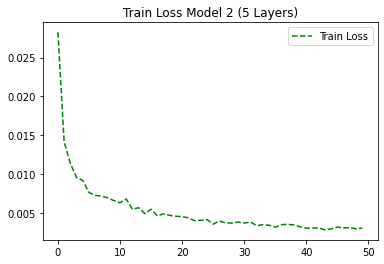

In [21]:
plt.title('Train Loss Model 2 (5 Layers)')
plt.plot(history2_5.history['loss'], '--', label='Train Loss', color='g')
plt.legend()
plt.show()

## Validation Loss Model 2 (5 Layers)

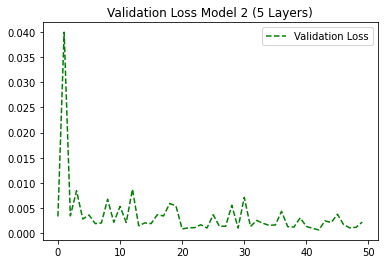

In [22]:
plt.title('Validation Loss Model 2 (5 Layers)')
plt.plot(history2_5.history['val_loss'], '--', label='Validation Loss', color='g')
plt.legend()
plt.show()

# Prediction with Model 2 (5 Layers)

8/8 [==============================] - 2s 10ms/step


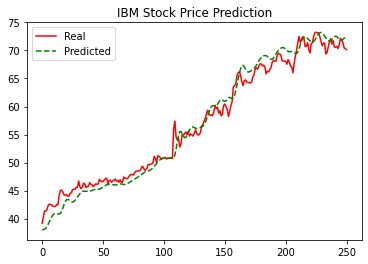

In [23]:
df2 = pd.concat((df["High"][:'2016'], df["High"]['2017':]), axis=0)
inputs = df2[len(df2) - len(test_set) - PERIOD:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(PERIOD, len(df['2017':]) + PERIOD):
    X_test.append(inputs[i-PERIOD:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
predict = model2_5.predict(X_test)
predict = scaler.inverse_transform(predict)

plt.plot(test_set, color='r',label='Real')
plt.plot(predict, '--', color='g',label='Predicted')
plt.title('IBM Stock Price Prediction')
plt.legend()
plt.show()

In [24]:
mse = 0
for i in range(len(test_set)):
    mse += (test_set[i] - predict[i]) ** 2

mse / len(test_set)

array([2.58759116])

# Train Model 2 (6 Layers)

In [40]:
model2_6 = Sequential()

model2_6.add(LSTM(units=50, return_sequences=True))
model2_6.add(Dropout(0.5))

model2_6.add(LSTM(units=50, return_sequences=True))
model2_6.add(Dropout(0.5))

model2_6.add(LSTM(units=50, return_sequences=True))
model2_6.add(Dropout(0.5))

model2_6.add(LSTM(units=50, return_sequences=True))
model2_6.add(Dropout(0.5))

model2_6.add(LSTM(units=50, return_sequences=True))
model2_6.add(Dropout(0.5))

model2_6.add(LSTM(units=50))
model2_6.add(Dropout(0.5))

model2_6.add(Dense(units=1))

model2_6.compile(optimizer='rmsprop',loss='mean_squared_error')

history2_6 = model2_6.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_train_val, y_train_val)
    )

Epoch 1/50
60/60 [==============================] - 15s 58ms/step - loss: 0.0320 - val_loss: 0.0135
Epoch 2/50
60/60 [==============================] - 1s 25ms/step - loss: 0.0146 - val_loss: 0.0121
Epoch 3/50
60/60 [==============================] - 1s 25ms/step - loss: 0.0122 - val_loss: 0.0287
Epoch 4/50
60/60 [==============================] - 1s 25ms/step - loss: 0.0109 - val_loss: 0.0042
Epoch 5/50
60/60 [==============================] - 1s 25ms/step - loss: 0.0100 - val_loss: 0.0155
Epoch 6/50
60/60 [==============================] - 1s 25ms/step - loss: 0.0088 - val_loss: 0.0114
Epoch 7/50
60/60 [==============================] - 2s 25ms/step - loss: 0.0081 - val_loss: 0.0226
Epoch 8/50
60/60 [==============================] - 1s 25ms/step - loss: 0.0084 - val_loss: 0.0035
Epoch 9/50
60/60 [==============================] - 1s 25ms/step - loss: 0.0081 - val_loss: 0.0101
Epoch 10/50
60/60 [==============================] - 1s 24ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 11

## Plot Train Loss Model 2 (5 Layers)

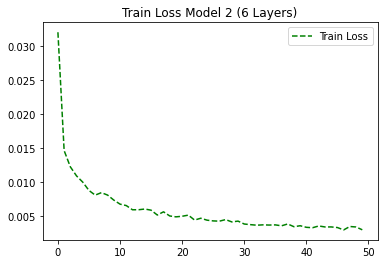

In [41]:
plt.title('Train Loss Model 2 (6 Layers)')
plt.plot(history2_6.history['loss'], '--', label='Train Loss', color='g')
plt.legend()
plt.show()

## Plot Validation Loss Model 2 (5 Layers)

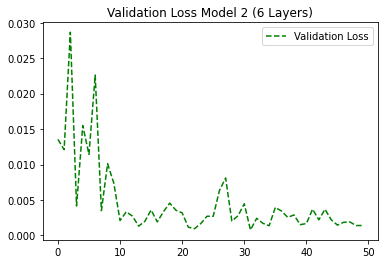

In [42]:
plt.title('Validation Loss Model 2 (6 Layers)')
plt.plot(history2_6.history['val_loss'], '--', label='Validation Loss', color='g')
plt.legend()
plt.show()

# Prediction with Model 2 (5 Layers)

8/8 [==============================] - 2s 11ms/step


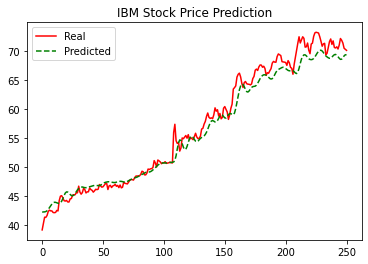

In [43]:
df2 = pd.concat((df["High"][:'2016'], df["High"]['2017':]), axis=0)
inputs = df2[len(df2) - len(test_set) - PERIOD:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(PERIOD, len(df['2017':]) + PERIOD):
    X_test.append(inputs[i-PERIOD:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
predict = model2_6.predict(X_test)
predict = scaler.inverse_transform(predict)

plt.plot(test_set, color='r',label='Real')
plt.plot(predict, '--', color='g',label='Predicted')
plt.title('IBM Stock Price Prediction')
plt.legend()
plt.show()

In [44]:
mse = 0
for i in range(len(test_set)):
    mse += (test_set[i] - predict[i]) ** 2

mse / len(test_set)

array([3.01583832])

# Model 3

# (Variable batch size)


# Train Model 3 (Batch Size = 32)

In [30]:
model3_32 = Sequential()

model3_32.add(LSTM(units=50, return_sequences=True))
model3_32.add(Dropout(0.5))

model3_32.add(LSTM(units=50, return_sequences=True))
model3_32.add(Dropout(0.5))

model3_32.add(LSTM(units=50, return_sequences=True))
model3_32.add(Dropout(0.5))

model3_32.add(LSTM(units=50))
model3_32.add(Dropout(0.5))

model3_32.add(Dense(units=1))

model3_32.compile(optimizer='rmsprop',loss='mean_squared_error')

history3_32 = model3_32.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_train_val, y_train_val)
    )

Epoch 1/40
60/60 [==============================] - 9s 40ms/step - loss: 0.0226 - val_loss: 0.0372
Epoch 2/40
60/60 [==============================] - 1s 18ms/step - loss: 0.0120 - val_loss: 0.0035
Epoch 3/40
60/60 [==============================] - 1s 18ms/step - loss: 0.0106 - val_loss: 0.0033
Epoch 4/40
60/60 [==============================] - 1s 18ms/step - loss: 0.0092 - val_loss: 0.0021
Epoch 5/40
60/60 [==============================] - 1s 17ms/step - loss: 0.0087 - val_loss: 0.0067
Epoch 6/40
60/60 [==============================] - 1s 18ms/step - loss: 0.0075 - val_loss: 0.0031
Epoch 7/40
60/60 [==============================] - 1s 18ms/step - loss: 0.0073 - val_loss: 0.0099
Epoch 8/40
60/60 [==============================] - 1s 18ms/step - loss: 0.0056 - val_loss: 0.0021
Epoch 9/40
60/60 [==============================] - 1s 18ms/step - loss: 0.0063 - val_loss: 0.0019
Epoch 10/40
60/60 [==============================] - 1s 18ms/step - loss: 0.0056 - val_loss: 0.0019
Epoch 11/

# Prediction With Model 3 (Batch Size = 32)

8/8 [==============================] - 1s 7ms/step


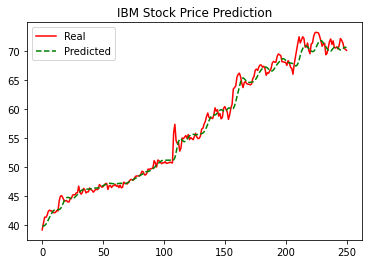

In [31]:
df2 = pd.concat((df["High"][:'2016'], df["High"]['2017':]), axis=0)
inputs = df2[len(df2) - len(test_set) - PERIOD:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(PERIOD, len(df['2017':]) + PERIOD):
    X_test.append(inputs[i-PERIOD:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
predict = model3_32.predict(X_test)
predict = scaler.inverse_transform(predict)

plt.plot(test_set, color='r',label='Real')
plt.plot(predict, '--', color='g',label='Predicted')
plt.title('IBM Stock Price Prediction')
plt.legend()
plt.show()

## Train Loss Model 3 (Batch Size = 32)

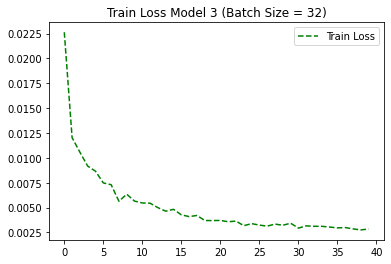

In [32]:
plt.title('Train Loss Model 3 (Batch Size = 32)')
plt.plot(history3_32.history['loss'], '--', label='Train Loss', color='g')
plt.legend()
plt.show()

## Validation Loss Model 3 (Batch Size = 32)

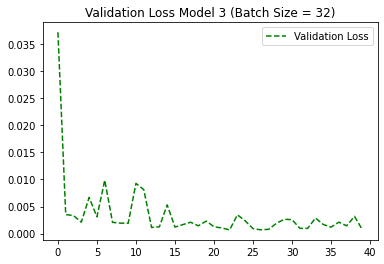

In [33]:
plt.title('Validation Loss Model 3 (Batch Size = 32)')
plt.plot(history3_32.history['val_loss'], '--', label='Validation Loss', color='g')
plt.legend()
plt.show()

In [34]:
mse = 0
for i in range(len(test_set)):
    mse += (test_set[i] - predict[i]) ** 2

mse / len(test_set)

array([1.35620713])

# Train Model 3 (Batch Size = 16)

In [35]:
model3_16 = Sequential()

model3_16.add(LSTM(units=50, return_sequences=True))
model3_16.add(Dropout(0.5))

model3_16.add(LSTM(units=50, return_sequences=True))
model3_16.add(Dropout(0.5))

model3_16.add(LSTM(units=50, return_sequences=True))
model3_16.add(Dropout(0.5))

model3_16.add(LSTM(units=50))
model3_16.add(Dropout(0.5))

model3_16.add(Dense(units=1))

model3_16.compile(optimizer='rmsprop',loss='mean_squared_error')

history3_16 = model3_16.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=16,
    validation_data=(X_train_val, y_train_val)
    )

Epoch 1/40
119/119 [==============================] - 10s 30ms/step - loss: 0.0212 - val_loss: 0.0026
Epoch 2/40
119/119 [==============================] - 2s 20ms/step - loss: 0.0123 - val_loss: 0.0018
Epoch 3/40
119/119 [==============================] - 2s 20ms/step - loss: 0.0091 - val_loss: 0.0028
Epoch 4/40
119/119 [==============================] - 2s 19ms/step - loss: 0.0082 - val_loss: 0.0065
Epoch 5/40
119/119 [==============================] - 2s 20ms/step - loss: 0.0067 - val_loss: 0.0015
Epoch 6/40
119/119 [==============================] - 2s 19ms/step - loss: 0.0057 - val_loss: 0.0035
Epoch 7/40
119/119 [==============================] - 2s 19ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 8/40
119/119 [==============================] - 2s 20ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 9/40
119/119 [==============================] - 2s 20ms/step - loss: 0.0047 - val_loss: 0.0022
Epoch 10/40
119/119 [==============================] - 2s 20ms/step - loss: 0.0043 - val_l

## Prediction with Model 3 (Batch Size = 16)

8/8 [==============================] - 1s 6ms/step


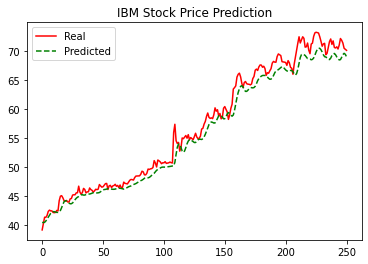

In [36]:
df2 = pd.concat((df["High"][:'2016'], df["High"]['2017':]), axis=0)
inputs = df2[len(df2) - len(test_set) - PERIOD:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(PERIOD, len(df['2017':]) + PERIOD):
    X_test.append(inputs[i-PERIOD:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
predict = model3_16.predict(X_test)
predict = scaler.inverse_transform(predict)

plt.plot(test_set, color='r',label='Real')
plt.plot(predict, '--', color='g',label='Predicted')
plt.title('IBM Stock Price Prediction')
plt.legend()
plt.show()

## Train Loss Model 3 (Batch Size = 16)




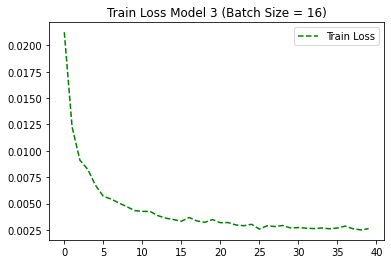

In [37]:
plt.title('Train Loss Model 3 (Batch Size = 16)')
plt.plot(history3_16.history['loss'], '--', label='Train Loss', color='g')
plt.legend()
plt.show()

##Validation Loss Model 3 (Batch Size = 16)

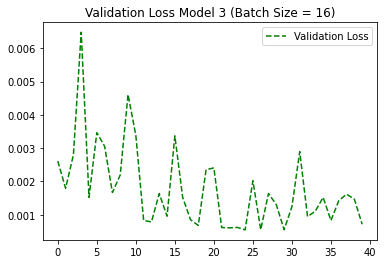

In [38]:
plt.title('Validation Loss Model 3 (Batch Size = 16)')
plt.plot(history3_16.history['val_loss'], '--', label='Validation Loss', color='g')
plt.legend()
plt.show()

In [39]:
mse = 0
for i in range(len(test_set)):
    mse += (test_set[i] - predict[i]) ** 2

mse / len(test_set)

array([2.92198569])